In [1]:
#dependencies
import numpy as np
import requests
import pandas as pd
import json
import datetime
from citipy import citipy
from random import uniform
import matplotlib.pyplot as plt
from config import api_key

In [2]:
# * In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full 
# gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you 
# were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking 
# of how you should counter this. (Hint: Consider the full range of latitudes).
cities_df = pd.DataFrame()
cities_df["Latitude"] = [np.random.uniform(-90, 90) for x in range(1500)]
cities_df["Longitude"] = [np.random.uniform(-180, 180) for x in range(1500)]
cities_df["City"] = ""
cities_df["Country"] = ""

In [3]:
for index, row in cities_df.iterrows():
    lat = row["Latitude"]
    lng = row["Longitude"]
    cities_df.set_value(index, "City", citipy.nearest_city(lat, lng).city_name)
    cities_df.set_value(index, "Country", citipy.nearest_city(lat, lng).country_code)
#cities_df.head()

In [4]:
cities_df = cities_df.drop_duplicates("City")
cities_df.count()


Latitude     612
Longitude    612
City         612
Country      612
dtype: int64

In [5]:
cities_df["Location"] = cities_df.City.str.cat(cities_df.Country, sep=",")
# cities_df = cities_df.head(30) 
# cities_df

In [6]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
locations = cities_df["Location"]
#print(locations)

In [7]:
#loop for target URL, counters, df
count= 1
#empty df to fill up with fun and exciting data
weather_df = pd.DataFrame(columns = ["City","Country","Latitude","Longitude","Max Temp", "Humidity","Cloudiness","Wind Speed"])

In [8]:
for index, location in locations.iteritems():
    print(f"Locating Weather data for: {location}, record # {count}")
    target_url = base_url + "q=" + str(location) + "&APPID=" + api_key + "&units=" + units
    try:
        response = requests.get(target_url).json()
        name = response["name"]
        country = response["sys"]["country"]
        temp = response["main"]["temp_max"]
        clouds = response["clouds"]["all"]
        humidity = response["main"]["humidity"]
        wind = response["wind"]["speed"]
        lat = response["coord"]["lat"]
        lon = response["coord"]["lon"]
        weather_df =weather_df.append({"City":name,"Country":country,"Latitude":lat,"Longitude":lon,"Max Temp":temp, "Humidity":humidity,"Cloudiness":clouds,"Wind Speed":wind}, ignore_index=True)
        count +=1
    except KeyError:
        print ("location not found")

Locating Weather data for: kaitangata,nz, record # 1
location not found
Locating Weather data for: te anau,nz, record # 1
Locating Weather data for: castro,cl, record # 2
Locating Weather data for: namatanai,pg, record # 3
Locating Weather data for: orsk,ru, record # 4
Locating Weather data for: hobart,au, record # 5
Locating Weather data for: yellowknife,ca, record # 6
Locating Weather data for: mar del plata,ar, record # 7
Locating Weather data for: arraial do cabo,br, record # 8
Locating Weather data for: mys shmidta,ru, record # 9
location not found
Locating Weather data for: dikson,ru, record # 9
Locating Weather data for: ulladulla,au, record # 10
Locating Weather data for: longyearbyen,sj, record # 11
Locating Weather data for: belushya guba,ru, record # 12
location not found
Locating Weather data for: esperance,au, record # 12
Locating Weather data for: severo-kurilsk,ru, record # 13
Locating Weather data for: camamu,br, record # 14
Locating Weather data for: port alfred,za, re

location not found
Locating Weather data for: tumannyy,ru, record # 122
location not found
Locating Weather data for: ponto novo,br, record # 122
Locating Weather data for: labytnangi,ru, record # 123
Locating Weather data for: manjo,cm, record # 124
Locating Weather data for: sinkat,sd, record # 125
location not found
Locating Weather data for: guajara-mirim,br, record # 125
location not found
Locating Weather data for: malegaon,in, record # 125
Locating Weather data for: georgetown,sh, record # 126
Locating Weather data for: lavrentiya,ru, record # 127
Locating Weather data for: greensburg,us, record # 128
Locating Weather data for: laguna,br, record # 129
Locating Weather data for: powell river,ca, record # 130
Locating Weather data for: port blair,in, record # 131
Locating Weather data for: nikolskoye,ru, record # 132
location not found
Locating Weather data for: beloretsk,ru, record # 132
Locating Weather data for: san jose,ph, record # 133
Locating Weather data for: sola,vu, reco

Locating Weather data for: bayanday,ru, record # 242
Locating Weather data for: okha,ru, record # 243
Locating Weather data for: sobolevo,ru, record # 244
location not found
Locating Weather data for: vila franca do campo,pt, record # 244
Locating Weather data for: poya,nc, record # 245
Locating Weather data for: port augusta,au, record # 246
Locating Weather data for: poronaysk,ru, record # 247
Locating Weather data for: cockburn town,bs, record # 248
Locating Weather data for: morondava,mg, record # 249
Locating Weather data for: amarante do maranhao,br, record # 250
Locating Weather data for: pochutla,mx, record # 251
location not found
Locating Weather data for: tokur,ru, record # 251
Locating Weather data for: karlskrona,se, record # 252
Locating Weather data for: meulaboh,id, record # 253
Locating Weather data for: kahului,us, record # 254
Locating Weather data for: kangaatsiaq,gl, record # 255
Locating Weather data for: babu,cn, record # 256
Locating Weather data for: lorengau,p

Locating Weather data for: rocha,uy, record # 370
Locating Weather data for: palabuhanratu,id, record # 371
location not found
Locating Weather data for: lichinga,mz, record # 371
Locating Weather data for: domoni,km, record # 372
Locating Weather data for: beringovskiy,ru, record # 373
Locating Weather data for: mazagao,br, record # 374
Locating Weather data for: prieska,za, record # 375
Locating Weather data for: batagay-alyta,ru, record # 376
Locating Weather data for: caravelas,br, record # 377
Locating Weather data for: grootfontein,na, record # 378
Locating Weather data for: labutta,mm, record # 379
location not found
Locating Weather data for: durazno,uy, record # 379
Locating Weather data for: adre,td, record # 380
Locating Weather data for: vanimo,pg, record # 381
Locating Weather data for: balykshi,kz, record # 382
location not found
Locating Weather data for: xingyi,cn, record # 382
location not found
Locating Weather data for: tengzhou,cn, record # 382
Locating Weather data

Locating Weather data for: xianyang,cn, record # 494
Locating Weather data for: manta,ec, record # 495
Locating Weather data for: walvis bay,na, record # 496
Locating Weather data for: aktau,kz, record # 497
Locating Weather data for: houma,cn, record # 498
location not found
Locating Weather data for: sawakin,sd, record # 498
Locating Weather data for: tuatapere,nz, record # 499
Locating Weather data for: poltavka,ru, record # 500
Locating Weather data for: anori,br, record # 501
Locating Weather data for: iisalmi,fi, record # 502
Locating Weather data for: zolotinka,ru, record # 503
location not found
Locating Weather data for: yar-sale,ru, record # 503
Locating Weather data for: liepaja,lv, record # 504
Locating Weather data for: jiazi,cn, record # 505
Locating Weather data for: vao,nc, record # 506
Locating Weather data for: broome,au, record # 507
Locating Weather data for: cape elizabeth,us, record # 508
location not found
Locating Weather data for: portland,au, record # 508
Loca

In [9]:
weather_df.head()

,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,Te Anau,NZ,-45.42,167.72,60.11,66,0,3.60
1,Castro,CL,-42.47,-73.77,48.59,78,80,5.95
2,Namatanai,PG,-3.67,152.43,84.50,100,20,2.15
3,Orsk,RU,51.20,58.57,32.00,88,75,15.66
4,Hobart,AU,-42.88,147.33,71.60,53,40,6.93


In [10]:
#check to see we still have at least #500 after dropping locations not found
weather_df.count()

City          515
Country       515
Latitude      515
Longitude     515
Max Temp      515
Humidity      515
Cloudiness    515
Wind Speed    515
dtype: int64

In [11]:
#save data to csv file
weather_df.to_csv("weatherdata.csv")

In [12]:
#recording date of report - I think this is faster than pulling from weather data
d = datetime.datetime.now()
plot_date = '/'.join(str(x) for x in (d.month, d.day, d.year))
#print(plot_date)

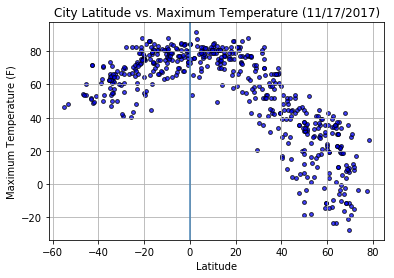

In [13]:
# build a series of scatter plots to showcase the following relationships:
# AND save each as png
# * Temperature (F) vs. Latitude
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black", s=15, alpha=0.75)
plt.axvline(0, color='steelblue', label = "Equator")
plt.grid()
plt.title(f"City Latitude vs. Maximum Temperature ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.savefig("LatvMaxTemp.png")
plt.show()

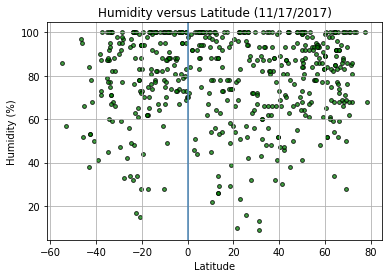

In [14]:
# * Humidity (%) vs. Latitude
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o", facecolors="green", edgecolors="black", s=15, alpha=0.75)
plt.axvline(0, color='steelblue', label = "Equator")
plt.grid()
plt.title(f"Humidity versus Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("LatvHumidity.png")
plt.show()

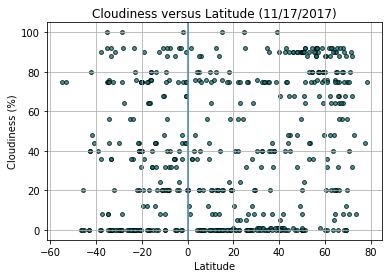

In [15]:
# * Cloudiness (%) vs. Latitude
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o", facecolors="teal", edgecolors="black", s=15, alpha=0.75)
plt.axvline(0, color='steelblue', label = "Equator")
plt.grid()
plt.title(f"Cloudiness versus Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("LatvCloudiness.png")
plt.show()

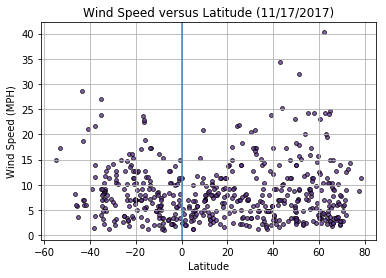

In [16]:
# * Wind Speed (mph) vs. Latitude
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o", facecolors="rebeccapurple", edgecolors="black", s=15, alpha=0.75)
plt.axvline(0, color='steelblue', label = "Equator")
plt.grid()
plt.title(f"Wind Speed versus Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.savefig("LatvWindspeed.png")
plt.show()

In [17]:
# Your final notebook must:

# * Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
# * Perform a weather check on each of the cities using a series of successive API calls.
# * Include a print log of each city as it's being processed with the city number, city name, and requested URL.
# * Save both a CSV of all data retrieved and png images for each scatter plot.

In [18]:
# As final considerations:

# * You must use Matplotlib to create your plots.
# * You must include a written description of three observable trends based on the data.
# * You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
# * You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.
# * See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format.

In [19]:
# ## Hints and Considerations

# * Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that 
# you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!